In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')

In [11]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [8]:
df.shape

(4340, 8)

In [10]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [6]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [71]:
df['transmission'].value_counts()

transmission
Manual       3892
Automatic     448
Name: count, dtype: int64

In [36]:
target = df["selling_price"]

In [37]:
target

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64

In [75]:
feature = df.drop('selling_price',axis=1)

In [76]:
feature

,name,year,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,90000,Diesel,Individual,Manual,First Owner


In [82]:
feature['transmission'] = feature['transmission'].apply(lambda x : 0 if x=='Manual' else 1)

In [83]:
feature.drop(['name','fuel','seller_type','owner'],axis=1,inplace=True)

In [87]:
feature

,year,km_driven,transmission
0,2007,70000,0
1,2007,50000,0
2,2012,100000,0
3,2017,46000,0
4,2014,141000,0
...,...,...,...
4335,2014,80000,0
4336,2014,80000,0
4337,2009,83000,0
4338,2016,90000,0


In [54]:
feature['transmission'].value_counts()

transmission
Manual       3892
Automatic     448
Name: count, dtype: int64

In [57]:
feature['seller_type'].value_counts()

seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64

In [48]:
from sklearn.linear_model import LinearRegression as ls

In [88]:
m = ls()

In [89]:
from sklearn.model_selection import train_test_split as std

In [90]:
X_train,X_test,Y_train,Y_test = std(feature,target,test_size = 0.25)

In [91]:
m.fit(X_train,Y_train)

LinearRegression()

In [92]:
y_pred= m.predict(X_test)

In [93]:
from sklearn.metrics import mean_squared_error as mse , r2_score

In [94]:
from math import sqrt
print(f"Mean Squared Error -----> {mse(Y_test,y_pred):.2f}")
print(f"Actual Error -----> {sqrt(mse(Y_test,y_pred)):.2f}")
print(f"Accuracy of the model -----> {r2_score(Y_test,y_pred):.2%}")

Mean Squared Error -----> 230432134193.25
Actual Error -----> 480033.47
Accuracy of the model -----> 41.75%


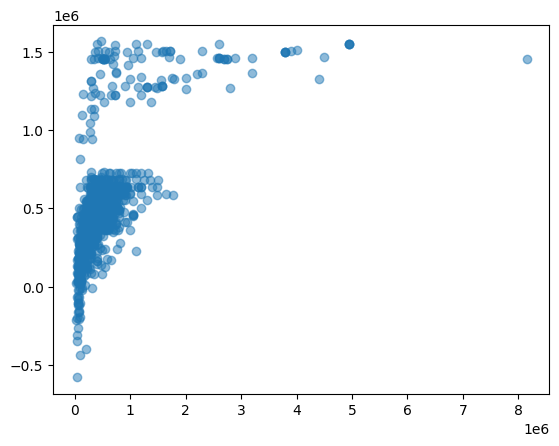

In [96]:
plt.scatter(Y_test,y_pred,alpha=0.5)

In [97]:
from sklearn.linear_model import LogisticRegression as lr

In [98]:
model = lr()

In [112]:
X_train,X_test,Y_train,Y_test = std(feature,target,test_size = 0.25)

In [113]:
model.fit(X_train,Y_train)

LogisticRegression()

In [117]:
y_pred= model.predict(X_test)

<BarContainer object of 1085 artists>

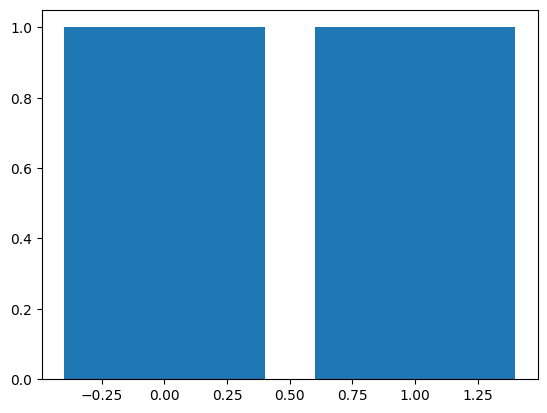

In [121]:
plt.bar(Y_test,y_pred)

In [104]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [105]:
target = df['transmission'].apply(lambda x: 0 if x=='Manual' else 1)

In [106]:
target

0       0
1       0
2       0
3       0
4       0
       ..
4335    0
4336    0
4337    0
4338    0
4339    0
Name: transmission, Length: 4340, dtype: int64

In [108]:
feature['selling_price'] = df['selling_price'].apply(lambda x : x)

In [110]:
feature.drop('transmission',axis =1 )

,year,km_driven,selling_price
0,2007,70000,60000
1,2007,50000,135000
2,2012,100000,600000
3,2017,46000,250000
4,2014,141000,450000
...,...,...,...
4335,2014,80000,409999
4336,2014,80000,409999
4337,2009,83000,110000
4338,2016,90000,865000
